In [49]:
#########################################################
## Stat 202A - Homework 6 SVM & Adaboost
## Author: Chaojie Feng
## Date : Nov.25, 2018
## Description: This script implements a support vector machine, an adaboost classifier
#########################################################

#############################################################
## INSTRUCTIONS: Please fill in the missing lines of code
## only where specified. Do not change function names,
## function inputs or outputs. You can add examples at the
## end of the script (in the "Optional examples" section) to
## double-check your work, but MAKE SURE TO COMMENT OUT ALL
## OF YOUR EXAMPLES BEFORE SUBMITTING.
##
## Very important: Do not use the function "os.chdir" anywhere
## in your code. If you do, I will be unable to grade your
## work since Python will attempt to change my working directory
## to one that does not exist.
#############################################################

import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def prepare_data(valid_digits=np.array((6, 5))):
    ## valid_digits is a vector containing the digits
    ## we wish to classify.
    ## Do not change anything inside of this function
    if len(valid_digits) != 2:
        raise Exception(
            "Error: you must specify exactly 2 digits for classification!")

    data = ds.load_digits()
    labels = data['target']
    features = data['data']
    X = features[(labels == valid_digits[0]) | (labels == valid_digits[1]), :]
    Y = labels[(labels == valid_digits[0]) | (labels == valid_digits[1]), ]
    X = X / np.repeat(np.max(X, axis=1), 64).reshape(X.shape[0], -1)

    Y[Y == valid_digits[0]] = 0
    Y[Y == valid_digits[1]] = 1

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=10)
    Y_train = Y_train.reshape((len(Y_train), 1))
    Y_test = Y_test.reshape((len(Y_test), 1))

    return X_train, Y_train, X_test, Y_test


####################################################
##           1: Support vector machine            ##
####################################################

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##
## Train an SVM to classify the digits data ##
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##

def my_SVM(X_train, Y_train, X_test, Y_test, lamb=0.01, num_iterations=200, learning_rate=0.1):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## lamb: Regularization parameter
    ## num_iterations: Number of iterations.
    ## learning_rate: Learning rate.

    ## Function should learn the parameters of an SVM.
    ## Intercept term is needed.

    #######################
    ## FILL IN CODE HERE ##
    #######################
    n,p = X_train.shape

    ntest,_ = X_test.shape
    
    X_train1 = np.hstack((np.ones((n,1)), X_train))
    X_test1 = np.hstack((np.ones((ntest, 1)), X_test))
    
    
    Y_train = 2*Y_train - 1
    Y_test = 2*Y_test - 1
    beta = np.random.rand((p+1),1)
    acc_train = []
    acc_test = []
    
    for i in range(num_iterations):
        s = X_train1.dot(beta)
        de = s * Y_train < 1

        dbeta = np.dot(np.ones((1, n)), de * Y_train * X_train1)/n

        beta = beta + learning_rate*dbeta.T
        
        beta[1:] = beta[1:] - beta[1:]*lamb 

        y_train_pred = X_train1.dot(beta)
        y_test_pred = X_test1.dot(beta)
        
        acc_train.append(np.mean(np.sign(y_train_pred) == Y_train))
        acc_test.append(np.mean(np.sign(y_test_pred) == Y_test))
    

    ## Function should output 3 things:
    ## 1. The learned parameters of the SVM, beta
    ## 2. The accuracy over the training set, acc_train (a "num_iterations" dimensional vector).
    ## 3. The accuracy over the testing set, acc_test (a "num_iterations" dimensional vector).

    return beta, acc_train, acc_test

######################################
## Function 2: Adaboost ##
######################################

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##
## Use Adaboost to classify the digits data ##
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ##


def my_Adaboost(X_train, Y_train, X_test, Y_test, num_iterations=200):
    ## X_train: Training set of features
    ## Y_train: Training set of labels corresponding to X_train
    ## X_test: Testing set of features
    ## Y_test: Testing set of labels correspdonding to X_test
    ## num_iterations: Number of iterations.

    ## Function should learn the parameters of an Adaboost classifier.
    ## Intercept term is needed.

    #######################
    ## FILL IN CODE HERE ##
    #######################
    
    
    n, p = X_train.shape     
    t = np.random.uniform()
    X_train1 = 2 * (X_train > t) - 1
    X_test1 = 2 * (X_test > t) - 1
    
    Y_train = 2 * Y_train - 1
    Y_test = 2 * Y_test - 1
    
    
    # initialize 
    beta = np.zeros((p, 1))
    weight = np.ones((n , 1)) / n
    weak_result = Y_train * X_train1 > 0 
    acc_train = np.zeros(num_iterations)
    acc_test = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        
        weight = weight / np.sum(weight)
        weighted_result = weight * weak_result
        weighted_accuracy = np.sum(weighted_result, axis = 0)
        e = 1 - weighted_accuracy  
        
        # choose the classifier to minimize error
        j = np.argmin(e)
        

        dbeta = 0.5 * np.log((1 - e[j]) / e[j])
        beta[j] = beta[j] + dbeta
        weight = weight * np.exp(- Y_train * X_train1[:, j].reshape((n, 1)) * dbeta)

        # Accuracy
        pred_train = np.dot(X_train1, beta)
        acc_train[i] = np.mean(np.sign(pred_train) == Y_train)
        pred_test = np.dot(X_test1, beta)
        acc_test[i] = np.mean(np.sign(pred_test) == Y_test)  
        

    ## Function should output 3 things:
    ## 1. The learned parameters of the adaboost classifier, beta
    ## 2. The accuracy over the training set, acc_train (a "num_iterations" dimensional vector).
    ## 3. The accuracy over the testing set, acc_test (a "num_iterations" dimensional vector).
    return beta, acc_train, acc_test

############################################################################
## Testing your functions and visualize the results here##
############################################################################



#def testing_example():
#
#    ####################################################
#    ## Optional examples (comment out your examples!) ##
#    ####################################################
#
#    X_train, Y_train, X_test, Y_test = prepare_data()
#
#    beta, acc_train, acc_test = my_SVM(X_train, Y_train, X_test, Y_test)
#
#    ax = plt.plot(range(200), acc_train, range(200), acc_test)
#    plt.xlabel('Number of iteration')
#    plt.ylabel('Accuracy')
#    plt.legend(('Training Accuracy', 'Testing Accuracy'))
#    plt.show()
#
#    beta, acc_train, acc_test = my_Adaboost(X_train, Y_train, X_test, Y_test)
#    plt.plot(range(200), acc_train, range(200), acc_test)
#    plt.xlabel('Number of iteration')
#    plt.ylabel('Accuracy')
#    plt.legend(('Training Accuracy', 'Testing Accuracy'))
#    plt.show()

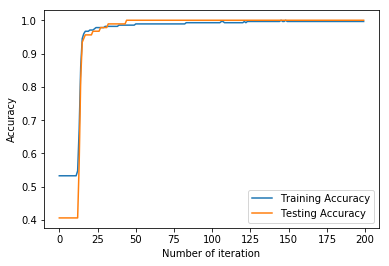

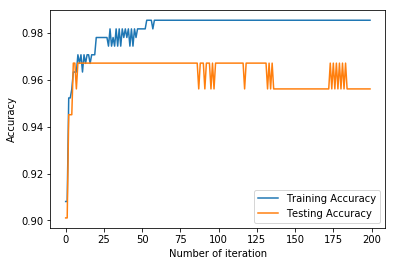

In [50]:
testing_example()